In [1]:


21631!pip install qiskit

SyntaxError: ignored

In [0]:
#Importing libraries 
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np
from qiskit.visualization import plot_histogram

In [0]:
import qiskit as q

#**Oracle**

In [0]:
#Creating Oracle that will mark states  |101⟩  and  |110⟩ 

def Oracle(circuit, register):
    circuit.cz(qr[2],qr[0]) #Creating a controlled Z gate with Qubit 3 controlling Qubit 1
    #circuit.cz(qr[2],qr[1]) #....Qubit 3 controlling Qubit 2

In [0]:
def Oracle_b(circuit):
  circuit.h(qr[2])
  circuit.ccx(qr[0],qr[1],qr[2])
  circuit.h(qr[2])



In [0]:
#Markls the state 110
def Oracle_c(circuit):
  circuit.h(qr[2])
  circuit.x(qr[0])
  circuit.ccx(qr[0],qr[1],qr[2])
  circuit.x(qr[0])
  circuit.h(qr[2])

#**Controlled Z Gate**

In [0]:
 #Implementing a Z gate with multiple controls
def n_controlled_Z(circuit, controls, target):
   
    #For qubit 1 as the control
    if (len(controls) == 1):

        #Applying Hadamard to target 
        circuit.h(target)

        #Applying a controlled NOT gate to target qubit with qubit 1 as the control
        circuit.cx(controls[0], target)
        
        #Applying Hadamard to target 
        circuit.h(target)

    #For qubit 2 as the control
    elif (len(controls) == 2):
        #Applying Hadamard to target 
        circuit.h(target)

        #Applying a controlled NOT gate to target qubit with qubit 2 as the control
        circuit.ccx(controls[0], controls[1], target)

        #Applying Hadamard to target 
        circuit.h(target)

#**Inversion About the Mean**

In [0]:
#Creating Inversion about the mean
def inversion_about_mean(circuit, register, n, barriers):

    #Hadamard gate applied to the register  
    circuit.h(register)

    #NOT gate applied to the register  
    circuit.x(register)

    #The barrier separates pieces of a circuit 
    if barriers:
        circuit.barrier()
    
    #Calling controlled z function with qubit 1 and 2 controlling the target qubit 3 
    n_controlled_Z(circuit, [register[j] for j in range(n-1)], register[n-1])
    
    if barriers:
        circuit.barrier()
    #NOT gate applied to the register  
    circuit.x(register)

    #Hadamard gate applied to the register 
    circuit.h(register)

#**Grover's Algorithm**

In [0]:
barriers = True
#Creating a 3 qubit quantum register 
qr = QuantumRegister(3)

#Creating a 3 bit classical register 
cr = ClassicalRegister(3)

#Creating the circuit
grovers_Circuit = QuantumCircuit(qr,cr)

#Applying Hadamard gate to the quantum register
grovers_Circuit.h(qr)

#Inserting a barrier 
grovers_Circuit.barrier()

iterations = 1
for i in np.arange(iterations):
  #Applying the oracle to the circuit
  #Oracle(grovers_Circuit, qr)
  Oracle_c(grovers_Circuit)

  #Inserting a barrier 
  grovers_Circuit.barrier()

  #Applying the inversion about the mean to the circuit
  inversion_about_mean(grovers_Circuit, qr, 3, barriers)

  #Inserting a barrier 
  grovers_Circuit.barrier()

#Measuring the circuit
grovers_Circuit.measure(qr,cr)

NameError: ignored

In [0]:
barriers = True
#Creating a 3 qubit quantum register 
qr = QuantumRegister(3)

#Creating a 3 bit classical register 
cr = ClassicalRegister(3)

#Creating the circuit
grovers_Circuit = QuantumCircuit(qr,cr)

#Applying Hadamard gate to the quantum register
grovers_Circuit.h(qr)

#Inserting a barrier 
grovers_Circuit.barrier()

iterations = 2
for i in np.arange(iterations):
  #Applying the oracle to the circuit
  Oracle(grovers_Circuit)

  #Inserting a barrier 
  grovers_Circuit.barrier()

  #Applying the inversion about the mean to the circuit
  inversion_about_mean(grovers_Circuit, qr, 3, barriers)

  #Inserting a barrier 
  grovers_Circuit.barrier()

#Measuring the circuit
grovers_Circuit.measure(qr,cr)

#Draws grovers circuit
grovers_Circuit.draw(output="mpl")

NameError: ignored

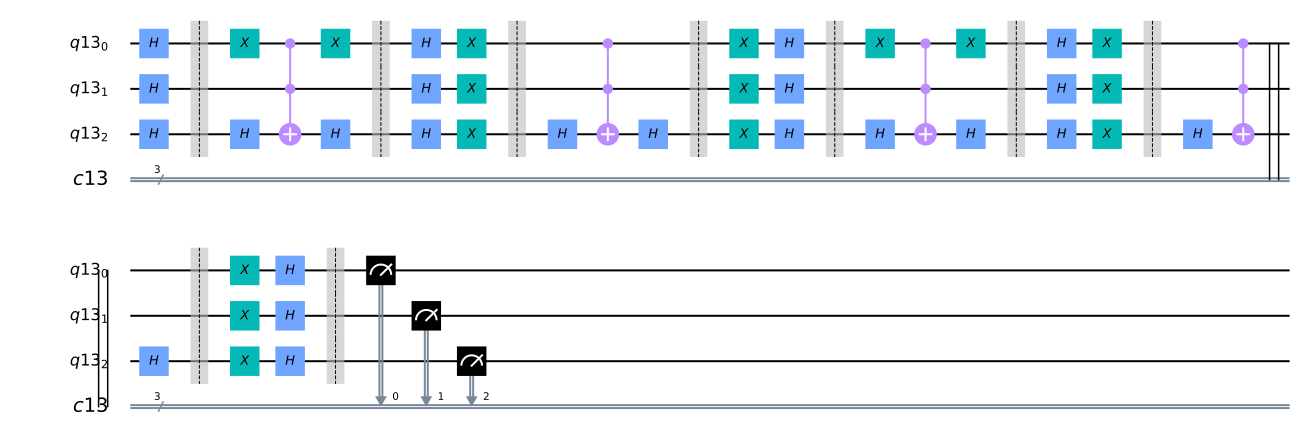

In [0]:
#Draws grovers circuit
grovers_Circuit.draw(output="mpl")

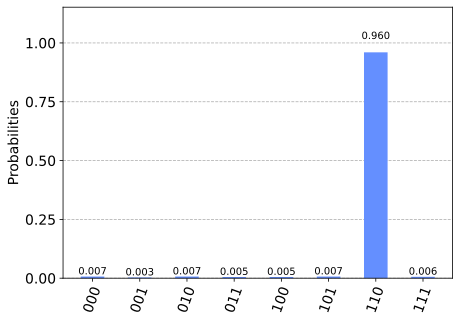

In [0]:
#calls Aer simulator
backend = BasicAer.get_backend('qasm_simulator')

#Sets how many measurements will occur
sampleSize = 1000

#Runs grovers circuit and records out come of each measurement
results = execute(grovers_Circuit, backend=backend, shots=sampleSize).result().get_counts()

#Counts amount of times each state was measured 
#answer = results.get_counts()

#Plots Histogram
plot_histogram(results)